In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

In [2]:
def plot_loss(file, key, label, window=1):
    plt.plot(file[key].head(10).rolling(window=window).mean(),label=label)

In [3]:
loss_01_02_gamma_no_dropout = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_02_gamma_no_dropout/01_02_gamma_no_dropout/eval.csv', delimiter=',')
loss_01_03_gamma = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_03_gamma/01_03_gamma/eval.csv', delimiter=',')
loss_01_03_mse = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_03_mse/01_03_mse/eval.csv', delimiter=',')
loss_01_03_mse_no_dropout = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_03_mse_no_dropout/01_03_mse_no_dropout/eval.csv', delimiter=',')
loss_01_08_mse_no_dropout = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_08_mse_no_dropout/01_08_mse_no_dropout/eval.csv', delimiter=',')
loss_01_08_mse_no_dropout_no_zero_centering = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_08_mse_no_dropout_no_zero_centering/01_08_mse_no_dropout_no_zero_centering/eval.csv', delimiter=',')
loss_01_09_mse_no_dropout_psl = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_09_mse_no_dropout_psl/01_09_mse_no_dropout_psl/eval.csv', delimiter=',')
loss_01_10_mse_no_dropout_psl = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_10_mse_no_dropout_psl/01_10_mse_no_dropout_psl/eval.csv', delimiter=',')
loss_01_10_gamma_no_dropout_psl = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_10_gamma_no_dropout_psl/01_10_gamma_no_dropout_psl/eval.csv', delimiter=',')
loss_01_11_mse_48 = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_11_mse_48/01_11_mse_48/eval.csv', delimiter=',')
loss_01_11_mse_48_nz20 = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_11_mse_48_nz20/01_11_mse_48_nz20/eval.csv', delimiter=',')
loss_01_11_gamma_48_nz50 = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_11_gamma_48_nz50/01_11_gamma_48_nz50/eval.csv', delimiter=',')
loss_01_11_gamma_48_nz20 = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_11_gamma_48_nz20/01_11_gamma_48_nz20/eval.csv', delimiter=',')
loss_01_11_mse_48_nz20_batch_s32 = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_11_mse_48_nz20_batch_s32/01_11_mse_48_nz20_batch_s32/eval.csv', delimiter=',')
loss_01_11_mse_48_nz20_batch_s16 = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_11_mse_48_nz20_batch_s16/01_11_mse_48_nz20_batch_s16/eval.csv', delimiter=',')
loss_01_11_gamma_48_nz20_batch_s128 = pd.read_csv('http://www.pik-potsdam.de/~sitreu/edvae/01_11_gamma_48_nz20_batch_s128/01_11_gamma_48_nz20_batch_s128/eval.csv', delimiter=',')


In [4]:
def reshape(file, key, scale):
    a = np.array([file[key].head(len(file)//scale*scale)])
    n = a.shape[1]
    m = n // scale
    b = np.zeros((n, m))
    for j in range(m):
        b[j*scale:(j+1) * scale,j] = 1/scale
    return np.matmul(a, b)

(0, 2500)

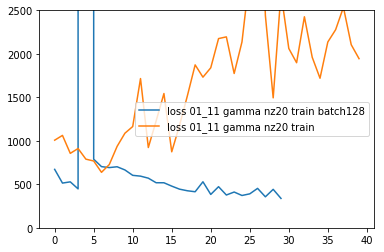

In [25]:
key='val_loss'
plt.cla()
plt.plot(loss_01_11_gamma_48_nz20_batch_s128[key].head(40).rolling(window=1).mean(),label='loss 01_11 gamma nz20 train batch128')
plt.plot(reshape(loss_01_11_gamma_48_nz20, key, 2)[0],label='loss 01_11 gamma nz20 train')

#plt.plot(reshape(loss_01_11_mse_48_nz20_batch_s16, key, 4)[0],label='loss 01_11 gamma nz20 train batch16')
#plt.plot(reshape(loss_01_11_mse_48_nz20_batch_s32, key, 2)[0],label='loss 01_11 gamma nz20 train batch32')


plt.legend()
plt.ylim([0,2500])

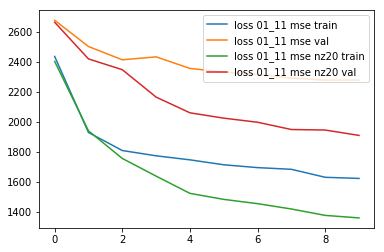

In [76]:
plot_loss(file=loss_01_11_mse_48, key='train_loss',label='loss 01_11 mse train')
plot_loss(file=loss_01_11_mse_48, key='val_loss',label='loss 01_11 mse val')
plot_loss(file=loss_01_11_mse_48_nz20, key='train_loss',label='loss 01_11 mse nz20 train')
plot_loss(file=loss_01_11_mse_48_nz20, key='val_loss',label='loss 01_11 mse nz20 val')
plt.legend()

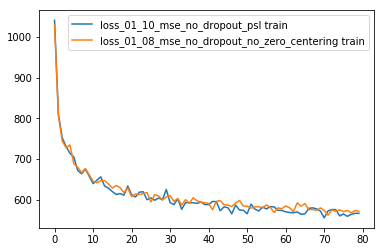

In [5]:
plot_loss(file=loss_01_10_mse_no_dropout_psl, key='train_loss',label='loss_01_10_mse_no_dropout_psl train')
#plot_loss(file=loss_01_10_mse_no_dropout_psl, key='val_loss',label='loss_01_10_mse_no_dropout_psl val')
#plot_loss(file=loss_01_09_mse_no_dropout_psl, key='train_loss',label='loss_01_09_mse_no_dropout_psl train')
#plot_loss(file=loss_01_09_mse_no_dropout_psl, key='val_loss',label='loss_01_09_mse_no_dropout_psl val')
plot_loss(file=loss_01_08_mse_no_dropout_no_zero_centering, key='train_loss',label='loss_01_08_mse_no_dropout_no_zero_centering train')
#plot_loss(file=loss_01_08_mse_no_dropout_no_zero_centering, key='val_loss',label='loss_01_08_mse_no_dropout_no_zero_centering val')
plt.legend()

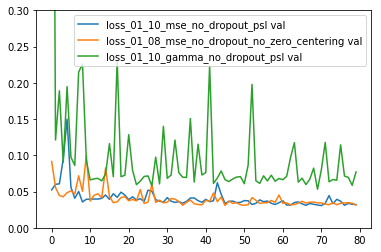

In [6]:
plot_loss(file=loss_01_10_mse_no_dropout_psl, key='val_cycle_loss',label='loss_01_10_mse_no_dropout_psl val')
plot_loss(file=loss_01_08_mse_no_dropout_no_zero_centering, key='val_cycle_loss',label='loss_01_08_mse_no_dropout_no_zero_centering val')
plot_loss(file=loss_01_10_gamma_no_dropout_psl, key='val_cycle_loss',label='loss_01_10_gamma_no_dropout_psl val')
plt.ylim([0,0.3])
plt.legend()

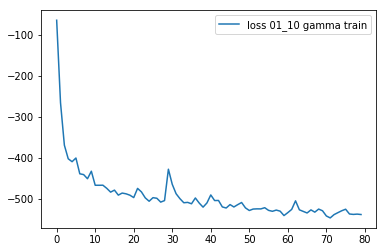

In [7]:
#plot_loss(file=loss_01_10_gamma_no_dropout_psl, key='val_loss',label='loss 01_10 gamma val')
plot_loss(file=loss_01_10_gamma_no_dropout_psl, key='train_loss',label='loss 01_10 gamma train')
plt.legend()

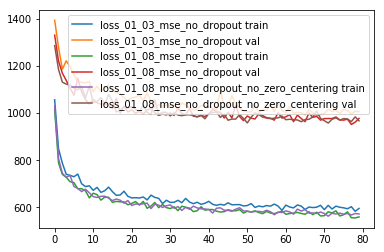

In [8]:
plot_loss(file=loss_01_03_mse_no_dropout, key='train_loss',label='loss_01_03_mse_no_dropout train')
plot_loss(file=loss_01_03_mse_no_dropout, key='val_loss',label='loss_01_03_mse_no_dropout val')
plot_loss(file=loss_01_08_mse_no_dropout, key='train_loss',label='loss_01_08_mse_no_dropout train')
plot_loss(file=loss_01_08_mse_no_dropout, key='val_loss',label='loss_01_08_mse_no_dropout val')
plot_loss(file=loss_01_08_mse_no_dropout_no_zero_centering, key='train_loss',label='loss_01_08_mse_no_dropout_no_zero_centering train')
plot_loss(file=loss_01_08_mse_no_dropout_no_zero_centering, key='val_loss',label='loss_01_08_mse_no_dropout_no_zero_centering val')
plt.legend()

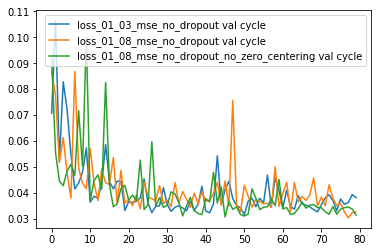

In [9]:
#plot_loss(file=loss_01_03_mse_no_dropout, key='train_cycle_loss',label='loss_01_03_mse_no_dropout train cycle')
plot_loss(file=loss_01_03_mse_no_dropout, key='val_cycle_loss',label='loss_01_03_mse_no_dropout val cycle')

#plot_loss(file=loss_01_08_mse_no_dropout, key='train_cycle_loss',label='loss_01_08_mse_no_dropout train cycle')
plot_loss(file=loss_01_08_mse_no_dropout, key='val_cycle_loss',label='loss_01_08_mse_no_dropout val cycle')

#plot_loss(file=loss_01_08_mse_no_dropout_no_zero_centering, key='train_cycle_loss',label='loss_01_08_mse_no_dropout_no_zero_centering train cycle')
plot_loss(file=loss_01_08_mse_no_dropout_no_zero_centering, key='val_cycle_loss',label='loss_01_08_mse_no_dropout_no_zero_centering val cycle')

plt.legend()

In [10]:
loss_01_08_mse_no_dropout_no_zero_centering.tail()

,epoch,val_mse,train_mse,val_kld,train_kld,val_cycle_loss,train_cycle_loss,val_loss,train_loss,inf_losses
75,9,956.222809,552.256369,20.105975,18.504975,0.033779,0.020338,976.328784,570.761344,0
76,9,953.664970,555.392074,21.107899,18.362292,0.034323,0.020616,974.772869,573.754366,0
77,9,943.885286,549.290290,19.628998,18.307628,0.034609,0.019956,963.514283,567.597918,0
78,9,965.551556,555.383195,18.241369,18.328769,0.033821,0.020316,983.792925,573.711964,0
79,9,945.491910,553.188325,21.280299,18.365673,0.031476,0.020252,966.772210,571.553997,0


In [22]:
loss_01_03_mse_no_dropout

TypeError: first() missing 1 required positional argument: 'offset'

In [21]:
loss_01_10_mse_no_dropout_psl.tail()

,epoch,val_mse,train_mse,val_kld,train_kld,val_cycle_loss,train_cycle_loss,val_loss,train_loss,inf_losses
1,0,1161.735746,793.225870,20.278863,17.269830,0.059991,0.046611,1182.014608,810.495699,0
2,0,1127.818737,735.583024,18.801895,16.882482,0.060672,0.038956,1146.620633,752.465505,0
3,0,1185.560823,713.728024,20.064573,16.908853,0.094938,0.039223,1205.625396,730.636877,0
4,0,1219.479876,697.336125,19.526040,16.944708,0.149972,0.037118,1239.005915,714.280833,0
5,0,1076.843372,687.885452,19.614391,17.136105,0.055966,0.034850,1096.457763,705.021557,0
